# Лекция 3

## Введение в Python

## Повтор предыдущего материала

In [80]:
# Что будет выведено?
test_list = [ s.lower().rstrip("T").strip("o")
    for s 
    in [
        "Topic",
        "tattoo",
        "TORCH",
        "Oregano",
        "coriander"
    ]
]

In [81]:
# При создании словаря в ключе была допущена ошибка, требуется к каждому элементу ключа добавить 10
test_dict = {
    (1,2,3): "Hello world!"
}

In [82]:
# Что будет выведено?
test_set = {1, 1.0, bool(1), '1', 1-1, (1,)}
test_set

{(1,), 0, 1, '1'}

Сформировать из кортежа словарей один словарь по следующим правилам:

1. Каждый ключ каждого словаря должен присутствовать в результирующем словаре
2. Значение ключа равно значениям в исходных словарях
3. Если ключи в словарях повторяются, то брать значение из словаря с большим индексом

In [83]:
# Из ДЗ2 №3

source_n3 = ({
    "A":123123,
    "B":123,
    "C":444,
    "D":3233
},{
    "A": 3323,
    "E": 13755,
    "S": 125,
    "R": 1997,
    "X": 665
},{
    "D": 1865,
    "W": 8753,
    "Q": 872,
    "S": 126,
    "B": 1231
})
# source_n3 -> test_dict
test_dict = {'A': 3323,
 'B': 1231,
 'C': 444,
 'D': 1865,
 'E': 13755,
 'S': 126,
 'R': 1997,
 'X': 665,
 'W': 8753,
 'Q': 872}


In [84]:
res_n3 = {}

# Предполагаемое решение
for item in source_n3:
    for k,v in item.items():
        res_n3[k] = v

assert res_n3 == test_dict

In [85]:
res_n3_1 = {}

for item in source_n3:
    res_n3_1.update(item)
    
assert res_n3_1 == test_dict

## Args и kwargs

In [86]:
def mult(a,b,c):
    return a*b*c

args_arr = [2,3,4]

# mult(2,3,4)
mult(*args_arr)

24

In [87]:
kwargs_dict = {"a":2, "b":3, "c":4}
# kwargs_dict = {"a":2, "b":3, "c":4, "d":5}

# mult(a=2, b=3, c=4)
mult(**kwargs_dict)


24

In [88]:
print(args_arr)

def args_not_kwargs(*args):
    print(args)
    return sum(args)
args_not_kwargs(*args_arr)
args_not_kwargs(1,2,23,4,5,6)


[2, 3, 4]
(2, 3, 4)
(1, 2, 23, 4, 5, 6)


41

In [89]:
print(kwargs_dict)

# Нет именованных параметров
args_not_kwargs(**kwargs_dict) # :(

{'a': 2, 'b': 3, 'c': 4}


TypeError: args_not_kwargs() got an unexpected keyword argument 'a'

In [90]:
print(args_arr)
print(kwargs_dict)


def func_accept_all(*args, **kwargs):
    print(args, kwargs)
    return 1
func_accept_all(1,2,3,4,*args_arr, test=10,test_2=20, **kwargs_dict)

[2, 3, 4]
{'a': 2, 'b': 3, 'c': 4}
(1, 2, 3, 4, 2, 3, 4) {'test': 10, 'test_2': 20, 'a': 2, 'b': 3, 'c': 4}


1

In [91]:
print(kwargs_dict)

def func_with_duplicating_params(a, **kwargs):
    print(a, kwargs)
    return 1

func_with_duplicating_params(1, **kwargs_dict)

{'a': 2, 'b': 3, 'c': 4}


TypeError: func_with_duplicating_params() got multiple values for argument 'a'

## Генераторы

In [92]:
# Пример генератора
def test_generator(string):
    str_to_return = sorted(string.upper())
    for char in str_to_return:
        if char !=" ":
            yield char

In [93]:
for i in test_generator('Я счастливый как никто, сотку я нашел в пальто'):
    print(i, end=" ")

, А А А А В В Е И И Й К К К К Л Л Л Н Н О О О П С С С Т Т Т Т У Ч Ш Ы Ь Я Я 

In [94]:
test_gen = test_generator('123123123')
print(test_gen)
next(test_gen)

<generator object test_generator at 0x7f2c7c88b970>


'1'

In [95]:
for i in test_gen:
    print(i, end="")

11222333

In [96]:
# Ошибка, тк генератор закончил работу
print(test_gen)
next(test_gen)

<generator object test_generator at 0x7f2c7c88b970>


StopIteration: 

TODO: написать генератор, возвращающий четные числа в интервале [0, 100]

In [97]:
def quick_task_gen():
    pass

## Декораторы

In [101]:
# Простая функция для теста декоратора
def test_hello_world(string="Hello world!"):
    print(string)
    return "Hello students!"

In [102]:
# Псевдодекоратор
def pseudo_decorator_func(before=1, after=2):
    print("Im decorating test_hello_world before", before)
    test_hello_world()
    print("Im decorating test_hello_world after", after)

In [105]:
test_hello_world()
print("")
pseudo_decorator_func()

Hello world!

Im decorating test_hello_world before 1
Hello world!
Im decorating test_hello_world after 2


In [106]:
# Декоратор (ну почти)
def decorator_without_args(func):
    def wrapper(before=1, after=2):
        print("Im decorating some func before", before)
        func()
        print("Im decorating some func after", after)
    return wrapper

In [110]:
# @decorator_without_args
# @decorator_with_args
def test_hello_world_2(string="Hello world!"):
    print(string)
    return "Im decorated!!!"

# dec_func = decorator_without_args(test_hello_world_2)
# dec_func()

# dec_func = test_hello_world_2
print("")
test_res = test_hello_world_2()
# print("RES", test_res)


Hello world!


In [111]:
# Наконец нормальный декоратор
def decorator_with_args(func):
    def wrapper(*args, **kwargs):
        print("Im decorating some func before", kwargs.get("before", "no_before_argument"))
        res = func(*args, **kwargs)
        print("Im decorating some func after",  kwargs.get("after", "no_after_argument"))
        return res
    return wrapper

In [112]:
# декоратор с параметром - количество повторений строк перед и после
def decorator_factory(kol):
    def decorator_with_args(func):
        def wrapper(*args, **kwargs):
            for i in range(kol):
                print("Im decorating some func before", kwargs.get("before", "no_before_argument"))
            res = func(*args, **kwargs)
            for i in range(kol):
                print("Im decorating some func after",  kwargs.get("after", "no_after_argument"))
            return res
        return wrapper
    return decorator_with_args

In [116]:
@decorator_factory(3)  # kol = 3 
def func(a, b):
    return a+b

func(1, 2)

Im decorating some func before no_before_argument
Im decorating some func before no_before_argument
Im decorating some func before no_before_argument
Im decorating some func after no_after_argument
Im decorating some func after no_after_argument
Im decorating some func after no_after_argument


3

## Рекурсия
Рекурсивная функция - функция, вызывающая сама себя (с определенным условием выхода)

In [49]:
# Рассчет числа Фибоначчи

# Последовательность Фибоначчи
# 1  2  3  4  5  6   7   8   9
# 1, 1, 2, 3, 5, 8, 13, 21, 34 ... 
def fibo_n_number(n):
    if n > 2:
        return fibo_n_number(n-1)+fibo_n_number(n-2)
    return 1

In [51]:
fibo_n_number(10)

55

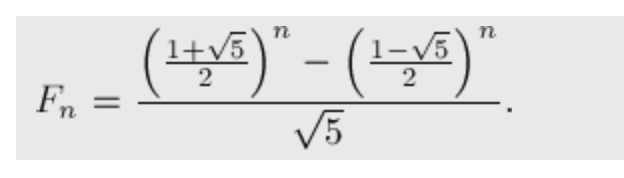

In [32]:
def fibo_number_formula(n):
    sqrt_5 = 5**0.5
    return int(((1/2+sqrt_5/2)**n - (1/2-sqrt_5/2)**n )/sqrt_5)

fibo_number_formula(5)

# ДОПОЛНЕНИЕ К ДЗ: сравнить время выполнения этих функций

5

## Map, zip, filter, lambda

In [33]:
test_arr = [1,2,3,4,5,6,7,8,9,10]

### Map

Применить функцию к каждому элементу массива

In [34]:
# С использованием функции
def cube(a):
    return a**3

list(map(cube, test_arr))

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

In [35]:
# С использованием лямбда (неименованной) функции
list(map(lambda x: x**3, test_arr))

[1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]

### Filter

Отфильтровать массив по условию

In [36]:
# С использованием лямбда (неименованной) функции
list(filter(lambda x: x%2, test_arr))

[1, 3, 5, 7, 9]

### Zip
Соединяет два и более массивов, получая массив кортежей

In [37]:
test_list_1 = [i for i in range(10)]
test_list_2 = [str(i)  for i in test_list_1]
test_list_3 = [str(i%3)  for i in test_list_1]

list(zip(test_list_1, test_list_2, test_list_3))

[(0, '0', '0'),
 (1, '1', '1'),
 (2, '2', '2'),
 (3, '3', '0'),
 (4, '4', '1'),
 (5, '5', '2'),
 (6, '6', '0'),
 (7, '7', '1'),
 (8, '8', '2'),
 (9, '9', '0')]

In [38]:
# Зачем зипа мне нада
for i,j,k in zip(test_list_1, test_list_2, test_list_3):
    print(i,j,k)

0 0 0
1 1 1
2 2 2
3 3 0
4 4 1
5 5 2
6 6 0
7 7 1
8 8 2
9 9 0


## Работа с файлами, менеждеры контекста


### Работа с файлами

Ключи:
1. "r" - чтение
2. "w" - запись, если файла не существует, создается новый.
3. "x" - открытие на запись, если файла не существует, иначе исключение.
4. "a" - дозапись (файл открывается на запись, но коретка ставится в конец файла)
5. "+" - открытие на чтение и запись

In [39]:
file = open('DZ_materials/Lecture_3/test_file_to_read.txt', 'r')
file_string = file.read()
file.close()

file_string

'Row1\nRow2\nRow3'

In [40]:
file = open('DZ_materials/Lecture_3/test_file_to_read.txt', 'r')
file_row_array = file.readlines()
file.close()

file_row_array

['Row1\n', 'Row2\n', 'Row3']

In [41]:
file = open('DZ_materials/Lecture_3/test_file_to_write.txt', 'w')
file.write("Written row\n")
file.close()

file = open('DZ_materials/Lecture_3/test_file_to_write.txt', 'rb')
file_string = file.read()
file.close()

file_string

b'Written row\n'

### Менеджеры контекста

In [42]:
with open('DZ_materials/Lecture_3/test_file_to_write.txt', 'w') as f:
    # Файл открылся
    f.write("Written row with context manager\n")
# Файл закрылся

with open('DZ_materials/Lecture_3/test_file_to_write.txt', 'r') as f:
    # Файл открылся
    file_string = f.read()
# Файл закрылся
file_string



'Written row with context manager\n'

## ДЗ

## 1] Вывод дерева директории (*)
Разработать функцию вывода директории в виде дерева (путь до директории подается в качестве входного параметра функции). При этом сначала выводятся все папки директории, затем все файлы. Напротив папок ставить знак `(d)`. 

В процессе выполнения задачи следует разобраться в модуле `os`, научиться с ним работать
(ссылка на документацию для более глубокого изучения: https://docs.python.org/3/library/os.html).
    
Пример вывода программы:
```
.
├── maven_repos (d)
├── release (d)
│   ├── release_d1 (d)
│   │   └── release_d1_f1.txt
│   ├── release_f1.txt
│   └── release_f2
├── svn (d)
│   ├── svn_d1 (d)
│   ├── svn_d2 (d)
│   └── svn_f1.txt
└── file_1.txt
```

## 2] Реализация идемпотентного прохода по множеству
Идемпотентность - свойство объекта или операции при повторном применении операции к объекту давать тот же результат, что и при первом (https://ru.wikipedia.org/wiki/%D0%98%D0%B4%D0%B5%D0%BC%D0%BF%D0%BE%D1%82%D0%B5%D0%BD%D1%82%D0%BD%D0%BE%D1%81%D1%82%D1%8C).

Как мы знаем из прошлой лекции множество - неупорядоченная коллекция. Реализовать генератор, который получает множество и выводит его всегда в определенном порядке.

### (Чет оно само робит)

In [43]:
test_set = {1,'2',3,4,'25',-6,bool(7),8}

def test_generator(_set):
    return _set


In [44]:
for i in range(100):
    a = [j for j in test_generator(test_set)]
    b = [k for k in test_generator(test_set)]
    assert a==b

## 3] Создать генератор случайной неубывающей последовательности чисел
Разобраться в модуле `random`, реализовать генератор, принимающий 3 параметра: длину последовательности, минимальное значение выходных чисел, максимальное значение выходных чисел. Для минимального и максимального параметра задать значения по умолчанию `[0,100)`
(Использовать random_seed для возможности повторения результата)

## 4] Написать декоратор, считающий время выполнения функции
Составить декоратор, который выводит в консоль время выполнения декорируемой функции ( (*) выводить в консоль также название функции)

## 5] Написать функцию записи в файл
Создать функцию, которая записывает принимает сообщение на вход строку. Функция дописывает в файл с указанием времени